In [1]:
__author__ = 'Kayli Glidic'

# Import Library

In [3]:
#import the module
#import os
#os.environ['TSHIRT_DATA'] = '.'
from tshirt.pipeline import spec_pipeline

import matplotlib.pyplot as plt
from matplotlib import colors

%matplotlib inline

#import bokeh to enable interactive plots
from bokeh.plotting import figure
from bokeh.io import output_notebook, push_notebook, show

output_notebook()

#import yaml to read in the parameter file
import yaml

#imports to use RECTE
import os
from astropy.table import QTable
import astropy.units as u
import numpy as np
from astropy.io import fits, ascii
from astropy.table import Table, join
import pandas as pd
from astropy.time import Time


#import to copy
from copy import deepcopy

#modeling light curves
from scipy.optimize import curve_fit
import batman

#to fix errors
import pdb

#to correct for time differences
from astropy.coordinates import SkyCoord
from astropy.coordinates import EarthLocation

Loading BokehJS ...

# Read in Parameter File

In [4]:
bspec = spec_pipeline.batch_spec(batchFile='corot1_batch_file.yaml')

# Import RECTE Charge Trap Correction Functions

In [5]:
import Charge_Correction_Functions
from Charge_Correction_Functions import RECTE, RECTEMulti, calculate_correction, calculate_correction_fast, charge_correction

Loading BokehJS ...

## Test the Function calculate_correction and charge_correction

ValueError: could not broadcast input array from shape (10,98) into shape (98)

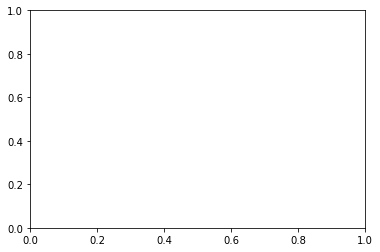

In [6]:
import time

# starting time
start = time.time()

#make sure the following csv file and fits image are located in this notebook directory. 

ramps_v1=calculate_correction('corot1_visit1_results.csv', 'corot1_visit1_median_image.fits')

spec_v1 = bspec.return_spec_obj(ind=0)
#spec_v1.specFile
 
correcteddata_v1, new_spec_v1 = charge_correction(spec_v1,ramps_v1)
#correcteddata_v1

# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")

ValueError: could not broadcast input array from shape (10,98) into shape (98)

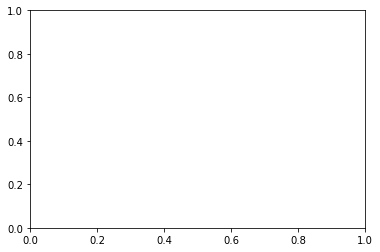

In [7]:
import time

# starting time
start = time.time()

#make sure the following csv file and fits image are located in this notebook directory. 

ramps_v2=calculate_correction('corot1_visit2_results.csv', 'corot1_visit2_median_image.fits')

spec_v2 = bspec.return_spec_obj(ind=1)
#spec_v2.specFile

correcteddata_v2, new_spec_v2 = charge_correction(spec_v2,ramps_v2)
#correcteddata_v2

# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")

ValueError: could not broadcast input array from shape (10,98) into shape (98)

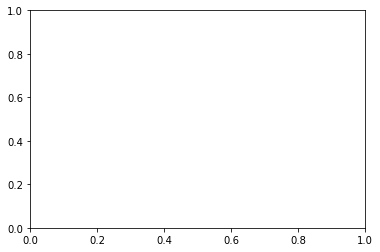

In [8]:
import time

# starting time
start = time.time()

#make sure the following csv file and fits image are located in this notebook directory. 

ramps_v3=calculate_correction('corot1_visit3_results.csv', 'corot1_visit3_median_image.fits')

spec_v3 = bspec.return_spec_obj(ind=2)
#spec_v3.specFile

correcteddata_v3, new_spec_v3 = charge_correction(spec_v3,ramps_v3)
#correcteddata_v3

# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")

ValueError: could not broadcast input array from shape (10,98) into shape (98)

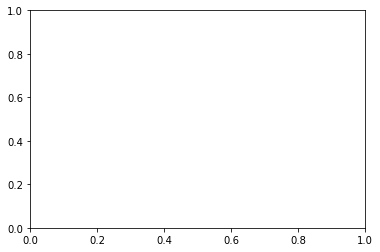

In [9]:
import time

# starting time
start = time.time()

#make sure the following csv file and fits image are located in this notebook directory. 

ramps_v4=calculate_correction('corot1_visit4_results.csv', 'corot1_visit4_median_image.fits')

spec_v4= bspec.return_spec_obj(ind=3)
#spec_v4.specFile

correcteddata_v4, new_spec_v4 = charge_correction(spec_v4,ramps_v4)
#correcteddata_v4

# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")

## Test the Function calculate_correction_fast

Runtime of the program is 0.1547863483428955


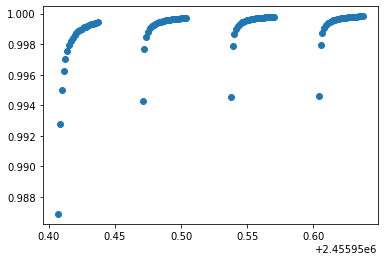

In [14]:
import time

# starting time
start = time.time()

#read in result file
spec_v1= bspec.return_spec_obj(ind=0)
corot1_visit1_results = pd.read_csv('corot1_visit1_results.csv')
x_v1 = corot1_visit1_results['Time'].values
exptime_v1 = corot1_visit1_results['Exp Time'][0]

#this is only for one bin!
Noise_table_v1 = spec_v1.print_noise_wavebin(nbins=1)
xList_v1 = np.arange(Noise_table_v1['Disp St'][0], Noise_table_v1['Disp End'][0],1)

#get data from the median image
median_image_v1 = fits.getdata('corot1_visit1_median_image.fits')

#obtain ramp model values
ramp_v1 = calculate_correction_fast(x_v1,exptime_v1,median_image_v1,dtrap_s=[0],trap_pop_s=200,xList=xList_v1)
ramp_v1_model = np.mean(ramp_v1,axis=0)

fig, ax = plt.subplots()
ax.plot(x_v1,ramp_v1_model, 'o')

# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")

Runtime of the program is 0.15456485748291016


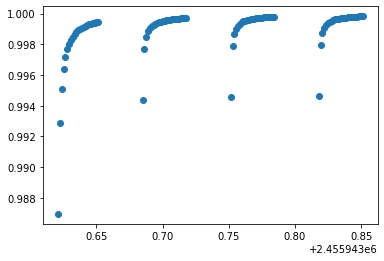

In [16]:
import time

# starting time
start = time.time()

#read in result file
spec_v2= bspec.return_spec_obj(ind=1)
corot1_visit2_results = pd.read_csv('corot1_visit2_results.csv')
x_v2 = corot1_visit2_results['Time'].values
exptime_v2 = corot1_visit2_results['Exp Time'][0]

#this is only for one bin!
Noise_table_v2 = spec_v2.print_noise_wavebin(nbins=1)
xList_v2 = np.arange(Noise_table_v2['Disp St'][0], Noise_table_v2['Disp End'][0],1)

#get data from the median image
median_image_v2 = fits.getdata('corot1_visit2_median_image.fits')

#obtain ramp model values
ramp_v2 = calculate_correction_fast(x_v2,exptime_v2,median_image_v2,dtrap_s=[0],trap_pop_s=200,xList=xList_v2)
ramp_v2_model = np.mean(ramp_v2,axis=0)

fig, ax = plt.subplots()
ax.plot(x_v2,ramp_v2_model, 'o')

# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")

Runtime of the program is 0.1268911361694336


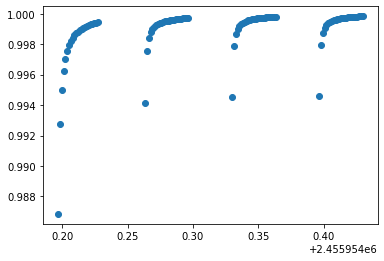

In [17]:
import time

# starting time
start = time.time()

#read in result file
spec_v3= bspec.return_spec_obj(ind=2)
corot1_visit3_results = pd.read_csv('corot1_visit3_results.csv')
x_v3 = corot1_visit3_results['Time'].values
exptime_v3 = corot1_visit3_results['Exp Time'][0]

#this is only for one bin!
Noise_table_v3 = spec_v3.print_noise_wavebin(nbins=1)
xList_v3 = np.arange(Noise_table_v3['Disp St'][0], Noise_table_v3['Disp End'][0],1)

#get data from the median image
median_image_v3 = fits.getdata('corot1_visit3_median_image.fits')

#obtain ramp model values
ramp_v3 = calculate_correction_fast(x_v3,exptime_v3,median_image_v3,dtrap_s=[0],trap_pop_s=200,xList=xList_v3)
ramp_v3_model = np.mean(ramp_v3,axis=0)

fig, ax = plt.subplots()
ax.plot(x_v3,ramp_v3_model, 'o')

# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")

Runtime of the program is 0.13979005813598633


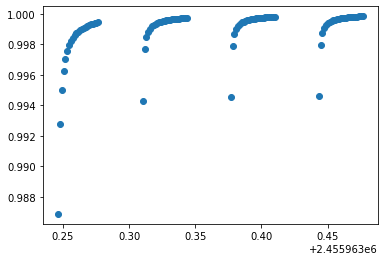

In [18]:
import time

# starting time
start = time.time()

#read in result file
spec_v4= bspec.return_spec_obj(ind=3)
corot1_visit4_results = pd.read_csv('corot1_visit4_results.csv')
x_v4 = corot1_visit4_results['Time'].values
exptime_v4 = corot1_visit4_results['Exp Time'][0]

#this is only for one bin!
Noise_table_v4 = spec_v4.print_noise_wavebin(nbins=1)
xList_v4 = np.arange(Noise_table_v4['Disp St'][0], Noise_table_v4['Disp End'][0],1)

#get data from the median image
median_image_v4 = fits.getdata('corot1_visit4_median_image.fits')

#obtain ramp model values
ramp_v4 = calculate_correction_fast(x_v4,exptime_v4,median_image_v4,dtrap_s=[0],trap_pop_s=200,xList=xList_v4)
ramp_v4_model = np.mean(ramp_v4,axis=0)

fig, ax = plt.subplots()
ax.plot(x_v4,ramp_v4_model, 'o')

# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")